In [1]:
import numpy as np
import pickle
import SimpleITK as sitk
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/liusheng/worksapce2024/Projects/RadiSmart')
from cardiac import cadc_load, cadc_locate,cadc_reorient, cadc_generate, cadc_segment, cadc_integrate,cadc_perfusion

from cardiac.cadc_interface import compute_cardiac_gate_function

In [2]:
with open(r'/home/liusheng/worksapce2024/Projects/RadiSmart/jupyters/心脏分析全流程/post_data/4.rest_g.pickle', 'rb') as f2:
    ipt_data = pickle.load(f2)

rst_data = ipt_data["Rest"]

print(rst_data.keys(), rst_data["Image"]["Meta"]["Shape"])
print(rst_data["Image"]["Meta"]["PixelSize"])

dict_keys(['Image', 'ROIInfo', 'Limits']) {'X': 80, 'Y': 80, 'Z': 81}
{'X': 6.64, 'Y': 6.64, 'Z': 6.64}


In [ ]:
# compute_cardiac_full_process_1

ogn_img, com_img, img_sz, px_sz, car_idx, frm, limits = cadc_load.load_cardiac_gate_data(rst_data)

print(ogn_img.max())
print(com_img.max())
# print(img_sz, px_sz, car_idx, frm, limits)

21.201868
50.0


In [4]:
car_com_img, car_bidx, spr_dict, car_ofs, car_idx = (
            cadc_locate.determinate_cardiac_area(com_img, car_idx, px_sz))

In [5]:
la_agl_xy, la_agl_z, axhl_dict, axvl_dict = cadc_reorient.determinate_cardiac_axes(car_com_img, car_idx)

In [6]:
rst_data['ROIInfo'] = {"AxisHL": axhl_dict, "AxisVL": axvl_dict, "Sphere": spr_dict}
zs, ys, xs = car_com_img.shape
car_img = np.zeros((frm, zs, ys, xs), dtype=np.float32)
hfl, hfw = int(ys / 2), int(xs / 2)
yc, xc = spr_dict['Y'], spr_dict['X']

# 直接切片取值不就行了...
for j in range(frm):
    for i in range(car_bidx, car_bidx + zs):
        car_img[j, i - car_bidx, :, :] = ogn_img[j, i, yc - hfl: yc + hfl, xc - hfw: xc + hfw]

In [7]:
sa_com_img, vla_com_img, hla_com_img, sa_img_dict, vla_img_dict, hla_img_dict, vtc_img_dict, hrz_img_dict = \
        (cadc_generate.generate_three_views_locate_images(com_img, car_com_img, la_agl_xy, la_agl_z, px_sz, car_ofs))

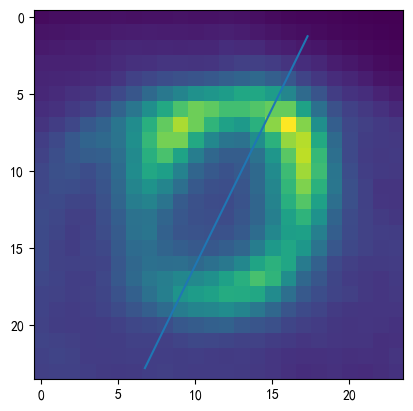

In [8]:
img = np.frombuffer(hrz_img_dict['Data'], dtype='<f4').reshape(24,24)
plt.imshow(img)

p0 = axhl_dict['P0']['X'], axhl_dict['P0']['Y']
p1 = axhl_dict['P1']['X'], axhl_dict['P1']['Y']

plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

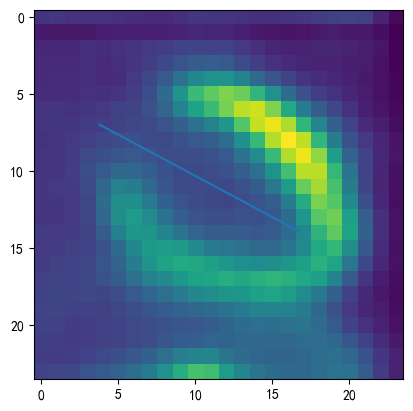

In [9]:
img = np.frombuffer(vtc_img_dict['Data'], dtype='<f4').reshape(24,24)
plt.imshow(img)

p0 = axvl_dict['P0']['X'], axvl_dict['P0']['Y']
p1 = axvl_dict['P1']['X'], axvl_dict['P1']['Y']

plt.plot((p0[0], p1[0]), (p0[1], p1[1]))